# Task L24

## Import the required libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

# Loading and transforming the dataset

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='.', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='.', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.1MB/s]


# Custom linear model

In [3]:
class LinearNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

# Education

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LinearNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, test_accuracies = [], []

for epoch in range(10):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Accuracy on test set
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = correct / total
    test_accuracies.append(acc)
    print(f"Epoch {epoch+1}: loss={train_losses[-1]:.4f}, acc={acc:.4f}")

Epoch 1: loss=0.4082, acc=0.9367
Epoch 2: loss=0.1994, acc=0.9492
Epoch 3: loss=0.1471, acc=0.9581
Epoch 4: loss=0.1174, acc=0.9646
Epoch 5: loss=0.0999, acc=0.9676
Epoch 6: loss=0.0860, acc=0.9631
Epoch 7: loss=0.0770, acc=0.9717
Epoch 8: loss=0.0677, acc=0.9677
Epoch 9: loss=0.0623, acc=0.9696
Epoch 10: loss=0.0566, acc=0.9735


# Visualization of Loss and Accuracy

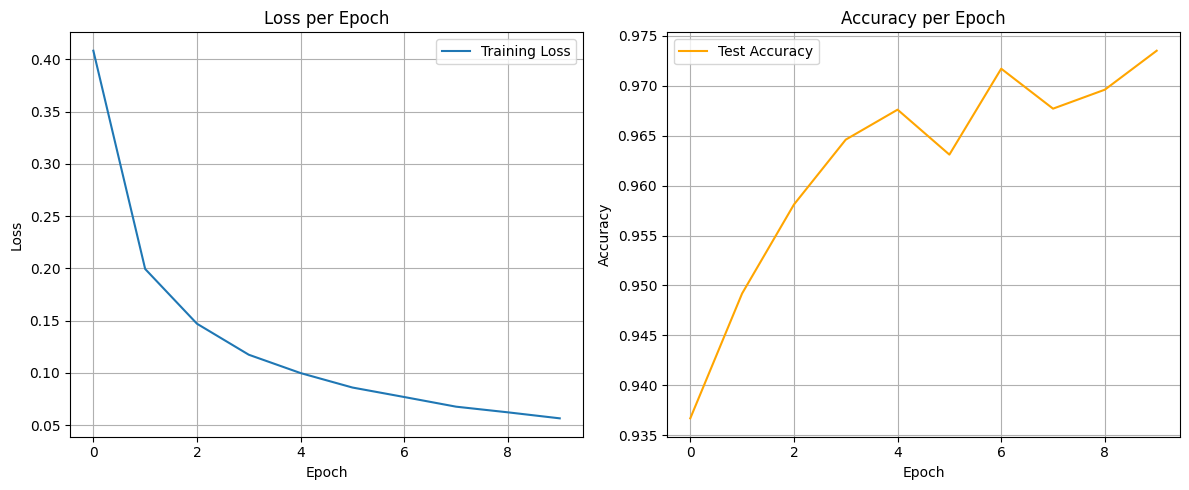

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='orange')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Visualization of 10 random predictions

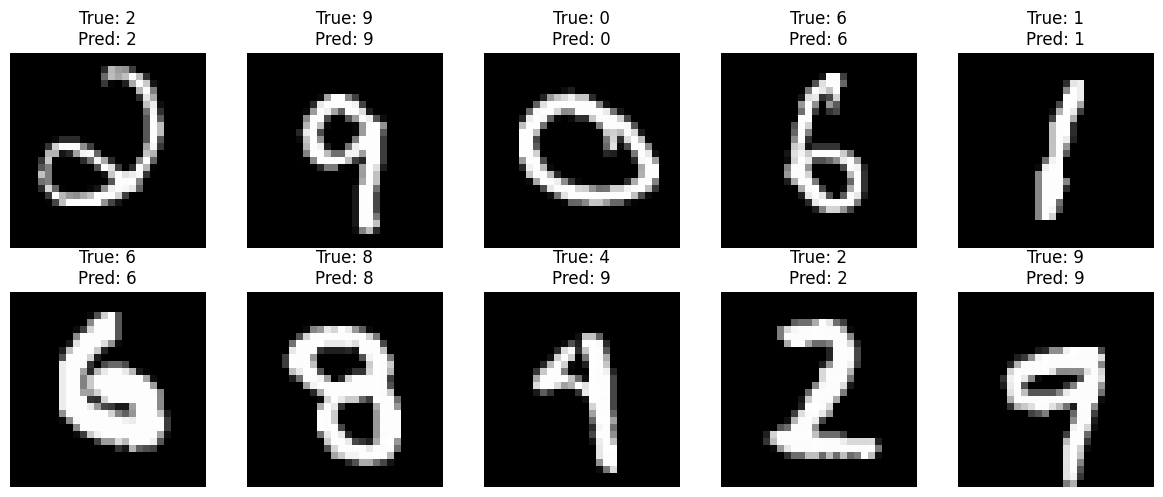

In [6]:
model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()
for i in range(10):
    idx = random.randint(0, len(images)-1)
    img = images[idx].cpu().squeeze()
    true_label = labels[idx].item()
    pred_label = predicted[idx].item()
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()